In [246]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [247]:
df=pd.read_csv('project2/Seoul_test.csv')

In [248]:
df.head()

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,202004,서울,강남구,건강보조식품 소매업,강원,고성군,60s,1,5,3,470000,3
1,202004,서울,강남구,건강보조식품 소매업,경기,남양주시,30s,1,2,3,9000,3
2,202004,서울,강남구,건강보조식품 소매업,경기,남양주시,40s,1,3,3,48000,3
3,202004,서울,강남구,건강보조식품 소매업,경기,부천시,30s,1,2,7,111500,8
4,202004,서울,강남구,건강보조식품 소매업,경기,성남시 분당구,30s,2,2,3,72000,5


In [249]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [250]:
df['년'] = df['연월'].apply(lambda x: grap_year(x))
df['월'] = df['연월'].apply(lambda x: grap_month(x))
df = df.drop(['연월'], axis=1)

In [251]:
df

,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월
0,서울,강남구,건강보조식품 소매업,강원,고성군,60s,1,5,3,470000,3,2020,4
1,서울,강남구,건강보조식품 소매업,경기,남양주시,30s,1,2,3,9000,3,2020,4
2,서울,강남구,건강보조식품 소매업,경기,남양주시,40s,1,3,3,48000,3,2020,4
3,서울,강남구,건강보조식품 소매업,경기,부천시,30s,1,2,7,111500,8,2020,4
4,서울,강남구,건강보조식품 소매업,경기,성남시 분당구,30s,2,2,3,72000,5,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348295,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,40s,2,3,7,46000,9,2020,4
348296,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,50s,2,4,4,64000,5,2020,4
348297,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,60s,1,5,3,72900,5,2020,4
348298,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,60s,2,5,9,64800,9,2020,4


In [252]:
df_1=pd.read_csv('corona_seoul_2.csv',encoding='CP949')

In [253]:
df_1=df_1.groupby(['월','매장_시군구'])['확진자수'].sum().reset_index()

In [254]:
df_1=df_1[df_1['매장_시군구']!='타시도']

In [255]:
df_1=df_1[df_1['매장_시군구']!='기타']

In [256]:
df_1

,월,매장_시군구,확진자수
0,4,강남구,23
1,4,강동구,3
2,4,강서구,4
3,4,관악구,9
4,4,광진구,2
5,4,구로구,1
7,4,노원구,3
8,4,도봉구,3
9,4,동대문구,5
10,4,동작구,7


In [209]:
merge_outer = pd.merge(df,df_1, how='outer',on=['월','매장_시군구'])

In [214]:
merge_outer

,년,월,매장_시도,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,확진자수_x,확진자수_y
0,2020,4,서울,강남구,건강보조식품 소매업,1,1,39,688400,39,161.0,23.0
1,2020,4,서울,강남구,건강보조식품 소매업,1,2,63,1806500,69,207.0,23.0
2,2020,4,서울,강남구,건강보조식품 소매업,1,3,47,5935900,49,138.0,23.0
3,2020,4,서울,강남구,건강보조식품 소매업,1,4,49,23188800,78,92.0,23.0
4,2020,4,서울,강남구,건강보조식품 소매업,1,5,44,5760806,54,92.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,1,562,11699785,655,60.0,3.0
6740,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,2,512,15386030,592,66.0,3.0
6741,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,3,327,11730268,399,54.0,3.0
6742,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,4,1143,46223490,1333,105.0,3.0


In [258]:
merge_outer = pd.merge(df,df_1, how='outer',on=['월','매장_시군구'])

In [257]:
df=df.groupby(['년','월','매장_시도','매장_시군구','업종명','성별','가구생애주기']).sum().reset_index()

In [260]:
df=merge_outer

In [261]:
df

,년,월,매장_시도,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,확진자수
0,2020,4,서울,강남구,건강보조식품 소매업,1,1,39,688400,39,23.0
1,2020,4,서울,강남구,건강보조식품 소매업,1,2,63,1806500,69,23.0
2,2020,4,서울,강남구,건강보조식품 소매업,1,3,47,5935900,49,23.0
3,2020,4,서울,강남구,건강보조식품 소매업,1,4,49,23188800,78,23.0
4,2020,4,서울,강남구,건강보조식품 소매업,1,5,44,5760806,54,23.0
...,...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,1,562,11699785,655,3.0
6740,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,2,512,15386030,592,3.0
6741,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,3,327,11730268,399,3.0
6742,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,4,1143,46223490,1333,3.0


In [263]:
del df['매장_시도']

KeyError: '매장_시도'

In [264]:
df

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,확진자수
0,2020,4,강남구,건강보조식품 소매업,1,1,39,688400,39,23.0
1,2020,4,강남구,건강보조식품 소매업,1,2,63,1806500,69,23.0
2,2020,4,강남구,건강보조식품 소매업,1,3,47,5935900,49,23.0
3,2020,4,강남구,건강보조식품 소매업,1,4,49,23188800,78,23.0
4,2020,4,강남구,건강보조식품 소매업,1,5,44,5760806,54,23.0
...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,중랑구,화장품 및 방향제 소매업,2,1,562,11699785,655,3.0
6740,2020,4,중랑구,화장품 및 방향제 소매업,2,2,512,15386030,592,3.0
6741,2020,4,중랑구,화장품 및 방향제 소매업,2,3,327,11730268,399,3.0
6742,2020,4,중랑구,화장품 및 방향제 소매업,2,4,1143,46223490,1333,3.0


In [265]:
df_1=pd.read_csv('project2/Seoul_test.csv')

In [266]:
df_1

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,202004,서울,강남구,건강보조식품 소매업,강원,고성군,60s,1,5,3,470000,3
1,202004,서울,강남구,건강보조식품 소매업,경기,남양주시,30s,1,2,3,9000,3
2,202004,서울,강남구,건강보조식품 소매업,경기,남양주시,40s,1,3,3,48000,3
3,202004,서울,강남구,건강보조식품 소매업,경기,부천시,30s,1,2,7,111500,8
4,202004,서울,강남구,건강보조식품 소매업,경기,성남시 분당구,30s,2,2,3,72000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
348295,202004,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,40s,2,3,7,46000,9
348296,202004,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,50s,2,4,4,64000,5
348297,202004,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,60s,1,5,3,72900,5
348298,202004,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,60s,2,5,9,64800,9


In [267]:
df_1['유입']=0

In [268]:

df_1.loc[df_1['매장_시도'] == df_1['고객_시도'], '유입'] = 1
df_1.loc[df_1['매장_시도'] != df_1['고객_시도'], '유입'] = 0
df_1.head()

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,유입
0,202004,서울,강남구,건강보조식품 소매업,강원,고성군,60s,1,5,3,470000,3,0
1,202004,서울,강남구,건강보조식품 소매업,경기,남양주시,30s,1,2,3,9000,3,0
2,202004,서울,강남구,건강보조식품 소매업,경기,남양주시,40s,1,3,3,48000,3,0
3,202004,서울,강남구,건강보조식품 소매업,경기,부천시,30s,1,2,7,111500,8,0
4,202004,서울,강남구,건강보조식품 소매업,경기,성남시 분당구,30s,2,2,3,72000,5,0


Text(0.5, 1.0, '유입유무별 평균이용금액')

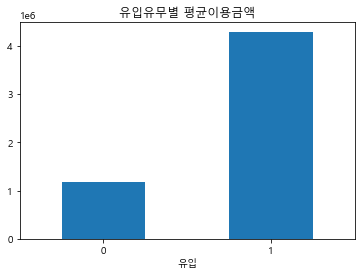

In [24]:
df.groupby('유입')['이용금액'].mean().plot.bar(rot=0)
plt.title('유입유무별 평균이용금액')

In [63]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [270]:
df_1['년'] = df_1['연월'].apply(lambda x: grap_year(x))
df_1['월'] = df_1['연월'].apply(lambda x: grap_month(x))
df_1 = df_1.drop(['연월'], axis=1)

In [271]:
df_1

,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,유입,년,월
0,서울,강남구,건강보조식품 소매업,강원,고성군,60s,1,5,3,470000,3,0,2020,4
1,서울,강남구,건강보조식품 소매업,경기,남양주시,30s,1,2,3,9000,3,0,2020,4
2,서울,강남구,건강보조식품 소매업,경기,남양주시,40s,1,3,3,48000,3,0,2020,4
3,서울,강남구,건강보조식품 소매업,경기,부천시,30s,1,2,7,111500,8,0,2020,4
4,서울,강남구,건강보조식품 소매업,경기,성남시 분당구,30s,2,2,3,72000,5,0,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348295,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,40s,2,3,7,46000,9,0,2020,4
348296,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,50s,2,4,4,64000,5,0,2020,4
348297,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,60s,1,5,3,72900,5,0,2020,4
348298,서울,중랑구,화장품 및 방향제 소매업,인천,연수구,60s,2,5,9,64800,9,0,2020,4


In [272]:
df_1=df_1.groupby(['년','월','매장_시도','매장_시군구','업종명','성별','가구생애주기']).sum().reset_index()

In [273]:
df_1

,년,월,매장_시도,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,유입
0,2020,4,서울,강남구,건강보조식품 소매업,1,1,39,688400,39,7
1,2020,4,서울,강남구,건강보조식품 소매업,1,2,63,1806500,69,6
2,2020,4,서울,강남구,건강보조식품 소매업,1,3,47,5935900,49,4
3,2020,4,서울,강남구,건강보조식품 소매업,1,4,49,23188800,78,4
4,2020,4,서울,강남구,건강보조식품 소매업,1,5,44,5760806,54,3
...,...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,1,562,11699785,655,10
6740,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,2,512,15386030,592,11
6741,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,3,327,11730268,399,7
6742,2020,4,서울,중랑구,화장품 및 방향제 소매업,2,4,1143,46223490,1333,18


In [274]:
del df_1['매장_시도']

In [275]:
df_1=df_1.sort_values(['년','월','매장_시군구','업종명'])

In [276]:
df_1

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,유입
0,2020,4,강남구,건강보조식품 소매업,1,1,39,688400,39,7
1,2020,4,강남구,건강보조식품 소매업,1,2,63,1806500,69,6
2,2020,4,강남구,건강보조식품 소매업,1,3,47,5935900,49,4
3,2020,4,강남구,건강보조식품 소매업,1,4,49,23188800,78,4
4,2020,4,강남구,건강보조식품 소매업,1,5,44,5760806,54,3
...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,중랑구,화장품 및 방향제 소매업,2,1,562,11699785,655,10
6740,2020,4,중랑구,화장품 및 방향제 소매업,2,2,512,15386030,592,11
6741,2020,4,중랑구,화장품 및 방향제 소매업,2,3,327,11730268,399,7
6742,2020,4,중랑구,화장품 및 방향제 소매업,2,4,1143,46223490,1333,18


In [277]:
df=df.sort_values(['년','월','매장_시군구','업종명'])

In [278]:
df

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,확진자수
0,2020,4,강남구,건강보조식품 소매업,1,1,39,688400,39,23.0
1,2020,4,강남구,건강보조식품 소매업,1,2,63,1806500,69,23.0
2,2020,4,강남구,건강보조식품 소매업,1,3,47,5935900,49,23.0
3,2020,4,강남구,건강보조식품 소매업,1,4,49,23188800,78,23.0
4,2020,4,강남구,건강보조식품 소매업,1,5,44,5760806,54,23.0
...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,중랑구,화장품 및 방향제 소매업,2,1,562,11699785,655,3.0
6740,2020,4,중랑구,화장품 및 방향제 소매업,2,2,512,15386030,592,3.0
6741,2020,4,중랑구,화장품 및 방향제 소매업,2,3,327,11730268,399,3.0
6742,2020,4,중랑구,화장품 및 방향제 소매업,2,4,1143,46223490,1333,3.0


In [280]:
aa=df['확진자수']

In [281]:
aa

0       23.0
1       23.0
2       23.0
3       23.0
4       23.0
        ... 
6739     3.0
6740     3.0
6741     3.0
6742     3.0
6743     3.0
Name: 확진자수, Length: 6744, dtype: float64

In [282]:
df_1['확진자수']=aa

In [283]:
df_1

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,유입,확진자수
0,2020,4,강남구,건강보조식품 소매업,1,1,39,688400,39,7,23.0
1,2020,4,강남구,건강보조식품 소매업,1,2,63,1806500,69,6,23.0
2,2020,4,강남구,건강보조식품 소매업,1,3,47,5935900,49,4,23.0
3,2020,4,강남구,건강보조식품 소매업,1,4,49,23188800,78,4,23.0
4,2020,4,강남구,건강보조식품 소매업,1,5,44,5760806,54,3,23.0
...,...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,중랑구,화장품 및 방향제 소매업,2,1,562,11699785,655,10,3.0
6740,2020,4,중랑구,화장품 및 방향제 소매업,2,2,512,15386030,592,11,3.0
6741,2020,4,중랑구,화장품 및 방향제 소매업,2,3,327,11730268,399,7,3.0
6742,2020,4,중랑구,화장품 및 방향제 소매업,2,4,1143,46223490,1333,18,3.0


In [72]:
df_1=pd.read_csv('seoul_add_corona.csv')

In [83]:
df_1=df_1.sort_values(['년','월'])

In [86]:
aa=df_1['확진자수']

In [87]:
df['확진자수']=aa

In [162]:
df_1['확진자수']=df_1['확진자수'].astype(int)

In [284]:
df_1.describe()

,년,월,성별,가구생애주기,이용고객수,이용금액,이용건수,유입,확진자수
count,6744.0,6744.0,6744.000000,6744.000000,6744.000000,6.744000e+03,6.744000e+03,6744.000000,6229.000000
mean,2020.0,4.0,1.490214,2.991548,3603.279508,1.187037e+08,8.318159e+03,21.073250,6.349494
std,0.0,0.0,0.499941,1.408883,12310.737785,3.733471e+08,4.203665e+04,18.198144,5.122396
min,2020.0,4.0,1.000000,1.000000,3.000000,4.000000e+03,1.000000e+00,0.000000,1.000000
25%,2020.0,4.0,1.000000,2.000000,83.000000,4.131268e+06,1.170000e+02,5.000000,3.000000
50%,2020.0,4.0,1.000000,3.000000,742.000000,2.656823e+07,1.071000e+03,16.000000,5.000000
75%,2020.0,4.0,2.000000,4.000000,3319.750000,8.764620e+07,5.560500e+03,34.000000,9.000000
max,2020.0,4.0,2.000000,5.000000,336611.000000,1.376851e+10,1.874965e+06,75.000000,23.000000


In [293]:
df_1=pd.read_csv('Seoul_full_test.csv')

In [294]:
df_1

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,유입,확진자수
0,2020,4,강남구,건강보조식품 소매업,1,1,39,688400,39,7,23.0
1,2020,4,강남구,건강보조식품 소매업,1,2,63,1806500,69,6,23.0
2,2020,4,강남구,건강보조식품 소매업,1,3,47,5935900,49,4,23.0
3,2020,4,강남구,건강보조식품 소매업,1,4,49,23188800,78,4,23.0
4,2020,4,강남구,건강보조식품 소매업,1,5,44,5760806,54,3,23.0
...,...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,중랑구,화장품 및 방향제 소매업,2,1,562,11699785,655,10,3.0
6740,2020,4,중랑구,화장품 및 방향제 소매업,2,2,512,15386030,592,11,3.0
6741,2020,4,중랑구,화장품 및 방향제 소매업,2,3,327,11730268,399,7,3.0
6742,2020,4,중랑구,화장품 및 방향제 소매업,2,4,1143,46223490,1333,18,3.0


In [296]:
df_1['확진자수']=df_1['확진자수'].fillna(0)

In [297]:
df_1.describe()

,년,월,성별,가구생애주기,이용고객수,이용금액,이용건수,유입,확진자수
count,6744.0,6744.0,6744.000000,6744.000000,6744.000000,6.744000e+03,6.744000e+03,6744.000000,6744.000000
mean,2020.0,4.0,1.490214,2.991548,3603.279508,1.187037e+08,8.318159e+03,21.073250,5.864620
std,0.0,0.0,0.499941,1.408883,12310.737785,3.733471e+08,4.203665e+04,18.198144,5.203744
min,2020.0,4.0,1.000000,1.000000,3.000000,4.000000e+03,1.000000e+00,0.000000,0.000000
25%,2020.0,4.0,1.000000,2.000000,83.000000,4.131268e+06,1.170000e+02,5.000000,3.000000
50%,2020.0,4.0,1.000000,3.000000,742.000000,2.656823e+07,1.071000e+03,16.000000,5.000000
75%,2020.0,4.0,2.000000,4.000000,3319.750000,8.764620e+07,5.560500e+03,34.000000,7.000000
max,2020.0,4.0,2.000000,5.000000,336611.000000,1.376851e+10,1.874965e+06,75.000000,23.000000


In [298]:
df_1.to_csv('Seoul_full_test.csv',index=False)

<AxesSubplot:xlabel='확진자수'>

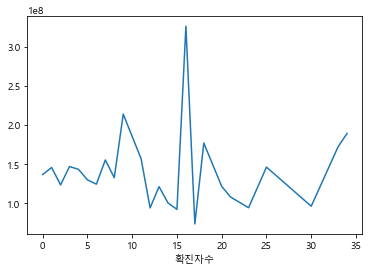

In [99]:
df.groupby('확진자수')['이용금액'].mean().plot()

<AxesSubplot:xlabel='확진자수'>

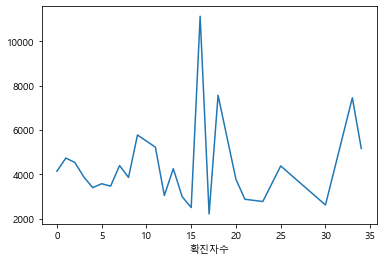

In [100]:
df.groupby('확진자수')['이용고객수'].mean().plot()

<AxesSubplot:xlabel='확진자수'>

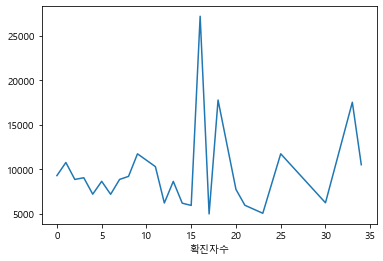

In [101]:
df.groupby('확진자수')['이용건수'].mean().plot()